# Random Forest Model 

***

<b>Assignment 16</b>

**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import warnings 
import janitor
from matplotlib import pyplot as plt
from sklearn import model_selection, preprocessing, ensemble, metrics

%matplotlib inline
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (8,6)

**Importing the dataset**

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')
df = janitor.clean_names(data)
df.head()

,user_id,gender,age,estimatedsalary,purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df['gender'] = df.gender.map({'Female':0, 'Male':1})

**Splitting the dataset into the Training set and Test set**

In [6]:
# FEature and Target
X,y = df.drop(columns=['user_id','purchased']), df['purchased']

# Train test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, random_state=27, test_size=0.2, shuffle=True)

X_train.shape, X_test.shape

((320, 3), (80, 3))

**Feature Scaling**

In [7]:
scaler = preprocessing.StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Fitting Random Forest to the Training set**

In [8]:
rf = ensemble.RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

y_pred = rf.predict(X_test)

**Predicting the Test set results**

In [14]:
print("Training score: {:.2f}".format(rf.score(X_train, y_train)))
print("Test score: {:.2f}".format(rf.score(X_test, y_test)))
print("Accuracy score: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

Training score: 1.00
Test score: 0.90
Accuracy score: 0.90


The model is suffering from overfitting

**Making the Confusion Matrix**

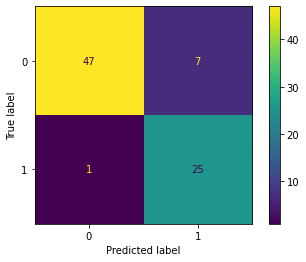

In [10]:
metrics.plot_confusion_matrix(rf, X_test, y_test);

**Visualising the Training set results**

In [11]:
print("Training score: {:.2f}".format(rf.score(X_train, y_train)))

Training score: 1.00


**Visualising the Test set results**

In [12]:
print("Test score: {:.2f}".format(rf.score(X_test, y_test)))

Test score: 0.90


**ROC Curve**

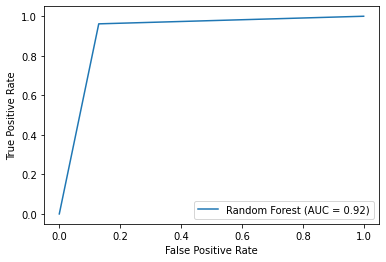

In [16]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')
display.plot();

**Hyperparameter Tuning**

In [19]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_sample_split = [2,5,10]
min_sample_leaf = [1,2,4]
bootstrap = [True, False]

random_grid = dict(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth,\
    min_samples_split=min_sample_split, min_samples_leaf=min_sample_leaf, bootstrap=bootstrap)


# We will use RandomizedSearchCV 
rf_random = model_selection.RandomizedSearchCV(
    estimator=ensemble.RandomForestClassifier(),
    param_distributions=random_grid,
    n_iter=100,
    cv=5,
    verbose=2,
    random_state=27,
    n_jobs=-1
)

# fit the model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=27, verbose=2)

In [20]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=40, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=400)

**Fit A Random Forest Model with Best Estimated Hyperparameters**

In [21]:
# tuned model
# initiate the model
rf_tuned = rf_random.best_estimator_

# fit the model
rf_tuned.fit(X_train, y_train)

y_pred = rf_tuned.predict(X_test)

print("Train Score: {:.2f}".format(rf_tuned.score(X_train, y_train)))
print("Test score: {:.2f}".format(rf_tuned.score(X_test, y_test)))

Train Score: 0.93
Test score: 0.88


- Test score 88 is not bad though it is less than the first model.
- The model is evidently not suffering from over fitting or under fitting.

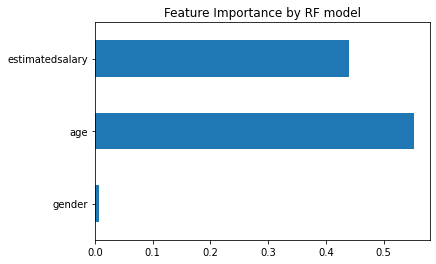

In [23]:
# feature importance

feature_importance = pd.Series(rf_tuned.feature_importances_, index=X.columns.tolist())

feature_importance.plot(kind='barh')
plt.title("Feature Importance by RF model")
plt.show()

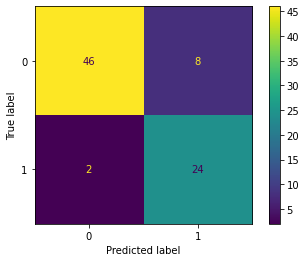

In [24]:
# confusion matrix
metrics.plot_confusion_matrix(rf_tuned, X_test, y_test);